In [16]:
import sys
import pickle
import nltk
from nltk.stem import PorterStemmer
import torch.nn.functional as F
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
sys.path.insert(0, '..')
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gxb18167\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [79]:
with open('Target_Pred_Strings.pickle', 'rb') as f:
    data = pickle.load(f)

In [80]:
target_string_list = data['Target_String']

In [81]:
predicted_string_list = data['Predicted_String']

In [82]:
def get_word_classiifcation_count(target_string_list, predicted_string_list, stemming=True):
    Correct_Predictions = {}
    counter_list = []


    for i in range(len(target_string_list)):
        target_string = target_string_list[i]
        predicted_string = predicted_string_list[i]

        predicted_string = predicted_string[0:len(target_string)]

        target_tokenized = word_tokenize(target_string)

        #print(target_tokenized)
        predicted_tokenized = word_tokenize(predicted_string)

        if stemming == True:
            target_tokenized_stemmed = []
            predicted_tokenized_stemmed = []
            for w in target_tokenized:
                target_tokenized_stemmed.append(ps.stem(w))
                counter_list.append(ps.stem(w))
            for w in predicted_tokenized:
                predicted_tokenized_stemmed.append(ps.stem(w))
        else:
            target_tokenized_stemmed = []
            predicted_tokenized_stemmed = []
            for w in target_tokenized:
                target_tokenized_stemmed.append(w)
                counter_list.append(w)
            for w in predicted_tokenized:
                predicted_tokenized_stemmed.append(w)

        for word in target_tokenized_stemmed:
            if word in predicted_tokenized_stemmed:
                if word in Correct_Predictions:
                    Correct_Predictions[word] += 1
                else:
                    Correct_Predictions[word] = 1

    target_word_counter = Counter(counter_list)

    return Correct_Predictions, target_word_counter


In [100]:
Correct_Predictions, word_frequency = get_word_classiifcation_count(target_string_list, predicted_string_list, stemming=True)

In [101]:
word_frequency

Counter({'the': 41820,
         ',': 38760,
         '.': 36510,
         'of': 25650,
         'and': 21750,
         'a': 18120,
         'in': 16350,
         'to': 15480,
         'wa': 14520,
         'he': 14040,
         'hi': 9330,
         "'s": 9180,
         'is': 8910,
         'as': 7830,
         'that': 5850,
         'an': 5790,
         '(': 5490,
         ')': 5490,
         'from': 4500,
         'presid': 4470,
         'it': 4140,
         'on': 4140,
         'with': 4020,
         'for': 3690,
         'by': 3060,
         'also': 2760,
         'secretari': 2760,
         'born': 2700,
         'like': 2610,
         'one': 2550,
         'at': 2550,
         'lawford': 2550,
         'first': 2520,
         'arm': 2490,
         'world': 2400,
         'be': 2310,
         'dure': 2190,
         '``': 2160,
         "''": 2160,
         'thi': 2160,
         'play': 2160,
         'war': 2160,
         'their': 2040,
         'when': 1950,
         'onli': 1920

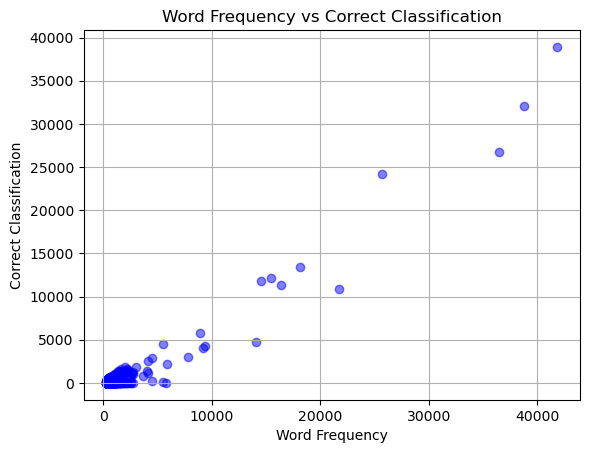

In [102]:
import matplotlib.pyplot as plt
# Extract data for plotting
words = list(word_frequency.keys())
frequencies = list(word_frequency.values())
classifications = [Correct_Predictions.get(word, 0) for word in words]

# Create a scatter plot
plt.scatter(frequencies, classifications, color='blue', alpha=0.5)

# Customize the plot
plt.title('Word Frequency vs Correct Classification')
plt.xlabel('Word Frequency')
plt.ylabel('Correct Classification')
plt.grid(True)
plt.show()